<a href="https://colab.research.google.com/github/abhiraman/ML_Algos/blob/main/Algorithms/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [2]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


0


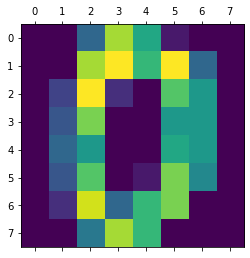

In [3]:
plt.matshow(digits.images[0])
print(digits.target[0])

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target"],axis=1),digits.target,test_size=.2,random_state=111)
print(x_train.shape,y_test.shape)

(1437, 64) (360,)


In [13]:
forest = RandomForestClassifier(n_estimators=30,criterion='entropy')

In [14]:
f_fit = forest.fit(x_train,y_train)

In [15]:
f_fit

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [21]:
score = forest.score(x_test,y_test)
print("prediction score:",score)

prediction score: 0.9694444444444444


In [24]:
y_pred = forest.predict(x_test)

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  2  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  1  0  0]
 [ 0  0  0  0 36  0  0  1  0  1]
 [ 0  0  0  0  1 33  0  0  0  1]
 [ 0  0  0  0  0  1 37  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  1 35  0]
 [ 0  0  0  0  0  0  0  0  1 32]]


Text(69.0, 0.5, 'Truth')

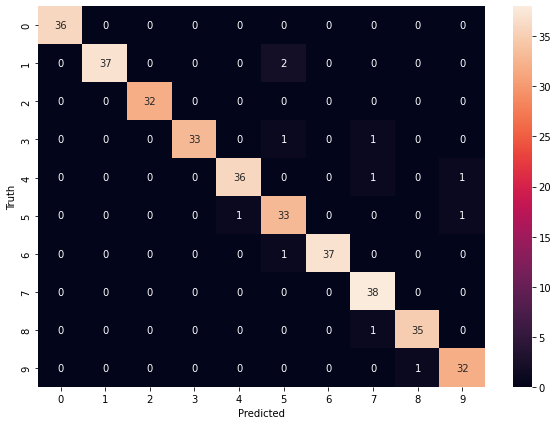

In [32]:
from IPython.core.pylabtools import figsize
fig = plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")